# Prvi domaći zadatak iz Signala i sistema

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import sounddevice as sd
from scipy.io import wavfile
from scipy import signal

from torchvision.io import read_image
from torchvision.transforms import ToPILImage
import torch
import torch.nn.functional as F
from PIL import Image

Koristio sam Jupyter GitHub Codespace, kao jednostavnu alternativu instalaciji svih paketa od nule.

In [44]:
M=5
P=2
Q=4
R=0

# 1. Vremenske transformacije
### a)

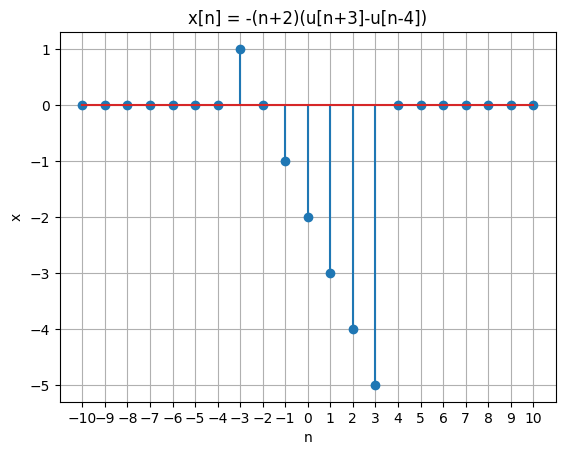

In [45]:
start_t = -10
end_t = 10
t = np.linspace(start_t, end_t, end_t-start_t+1)
x = -(t+2)*((t>=-3).astype(int) - (t>=4).astype(int))
plt.figure()
plt.stem(t,x)
plt.xlabel('n')
plt.ylabel('x')
plt.xticks(t)
plt.grid(True)
plt.title('x[n] = -(n+2)(u[n+3]-u[n-4])')

plt.show()

### b)

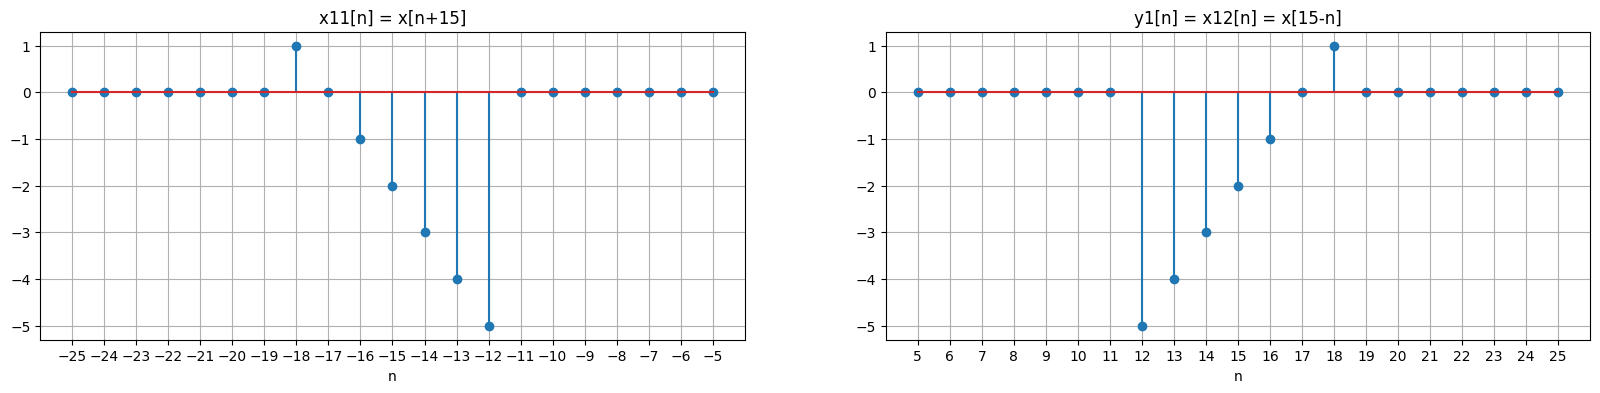

In [46]:

fig, ax = plt.subplots(1,2)
fig.set_size_inches((20,4))
for axi in ax:
    axi.set_xlabel('n')
    axi.grid(True)

t1 = t-3*(Q+1)

ax[0].stem(t1,x)
ax[0].set_title('x11[n] = x[n+15]')
ax[0].set_xticks(t1)
#plt.title('y[n] = x[15 + n]')

t2 = -t1[::-1]
x2 = x[::-1]

ax[1].stem(t2,x2)
ax[1].set_title('y1[n] = x12[n] = x[15-n]')
ax[1].set_xticks(t2)

#R+1 = 1 tako da nema skaliranja

plt.show()

Analitički oblik:

$ y[n] = (n-17)*(u[n-12] - u[n-19]) $ 

<StemContainer object of 3 artists>

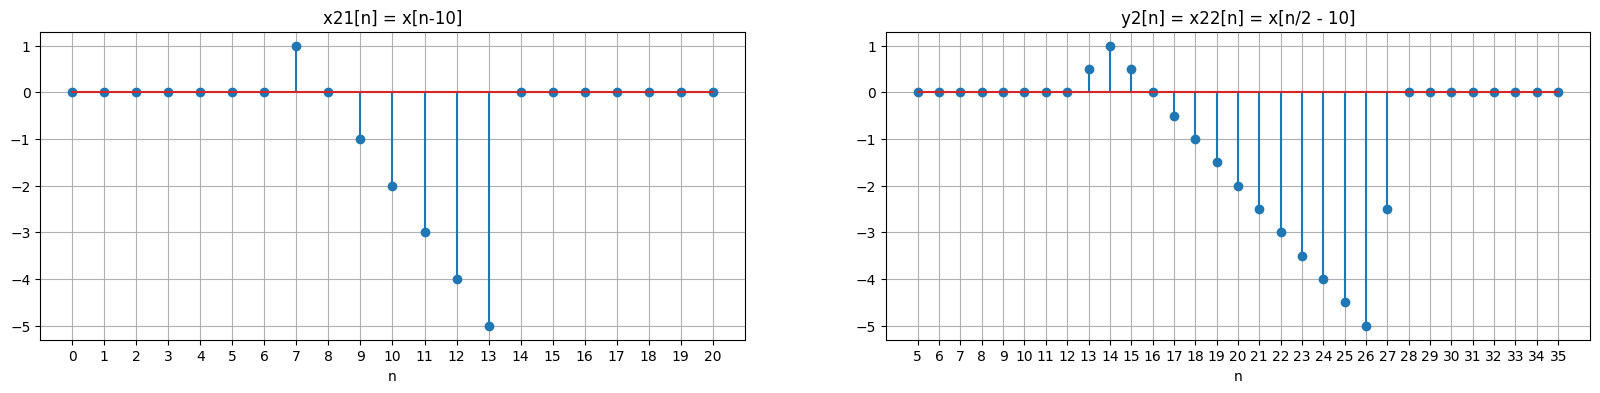

In [47]:
# t2 = (-2*(Q+1) + t/2)[::2];
# plt.figure()
# plt.stem(t2,x[::2])
# plt.xlabel('n')
# plt.ylabel('y')
# plt.xticks(t2)
# plt.grid(True)
# plt.title('y[n] = x[-10 + n/2]')

# plt.show()

fig, ax = plt.subplots(1,2)
fig.set_size_inches((20,4))
for axi in ax:
    axi.set_xlabel('n')
    axi.grid(True)

t1 = t + 2*(Q+1)
ax[0].set_title('x21[n] = x[n-10]')
ax[0].set_xticks(t1)
ax[0].stem(t1,x)

#nema inverzije

t2=np.linspace(2*t1[0], 2*t1[-1], 2*len(t1)-1)
x2 = np.zeros_like(t2)
x2[::2] = x
x2[1::2] = (x[:-1]+x[1:])/2

x2 = x2[5:-5] #skracivanje zbog preglednosti
t2 = t2[5:-5]

ax[1].set_title('y2[n] = x22[n] = x[n/2 - 10]')
ax[1].set_xticks(t2)
ax[1].stem(t2,x2)


Korišćena je linearna interpolacija. Ovako se čuva linearna osobina srednjeg dela signala. Mana ovog pristupa je što se na početku i na kraju aktivnog dela signala stvaraju Dirakovi impulsi. Neka složenija metoda interpolacije koja čuva nagle skokove i padove tamo gde su bili u originalnom signalu bi možda bila pogodnija. 

Analitički oblik: $ \frac{1}{2}(16 - t) \cdot (u(t-14) - u(t-28) ) + 3\delta(t-27) + \frac{1}{2}\delta(t-13)$



# 2. Konvolucija
### a)

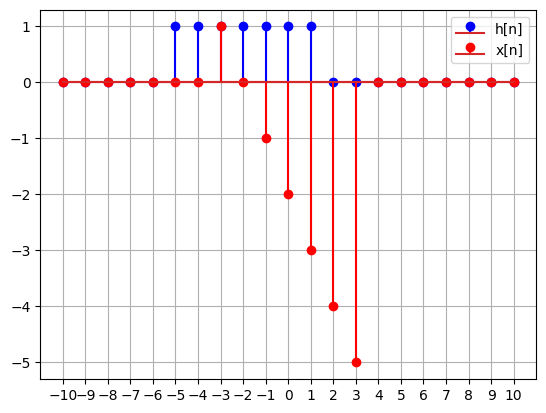

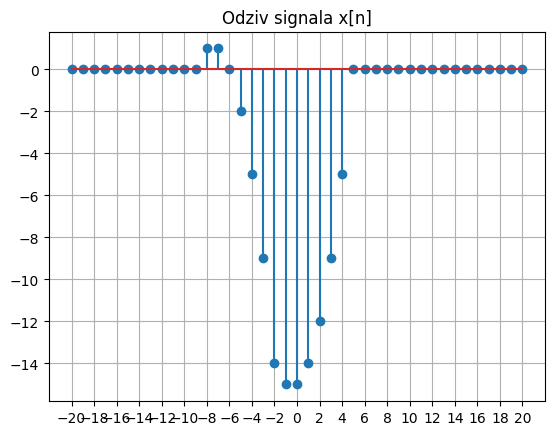

In [ ]:
th=t #isto od -10 do 10
h = np.zeros_like(th)
h = (th>=-5) & (th<=1)
tc = np.linspace(t[0]+th[0], t[-1]+th[-1], len(th)+len(t)-1)
plt.stem(th,h, 'blue', label = 'h[n]')
plt.stem(t,x, 'red', label = 'x[n]')
plt.xticks(t if len(t)>len(th) else th)
plt.legend()
plt.grid(True)
plt.show()
ir = np.convolve(x, h)
plt.stem(tc, ir)
plt.xticks(tc[::2])
plt.title('Odziv signala x[n]')
plt.grid(True)
plt.show()

### b) Konvolucija zvučnog signala

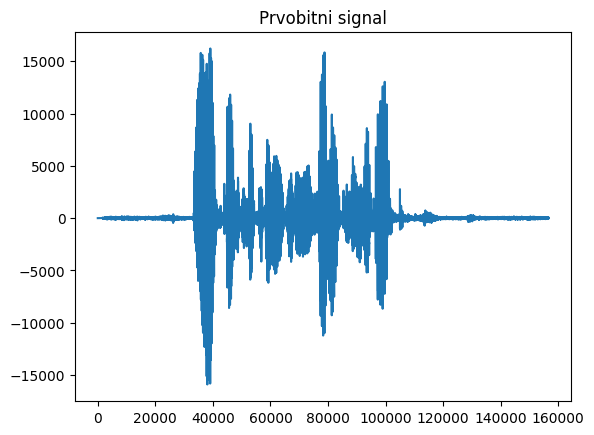

0.0
-0.0002668340691211837
-3.087182020251914e-05
0.0008262181347501035
0.000216102741417634
0.01867328294399539
0.0
0.005782851023553235
0.0
0.009759307473100859


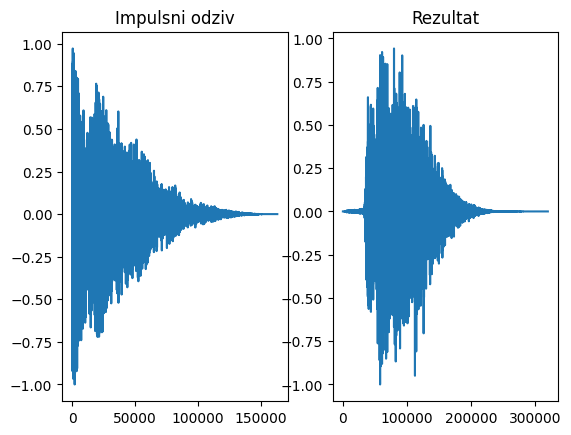

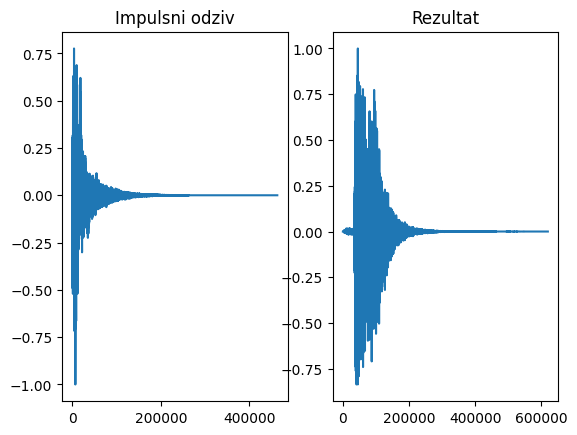

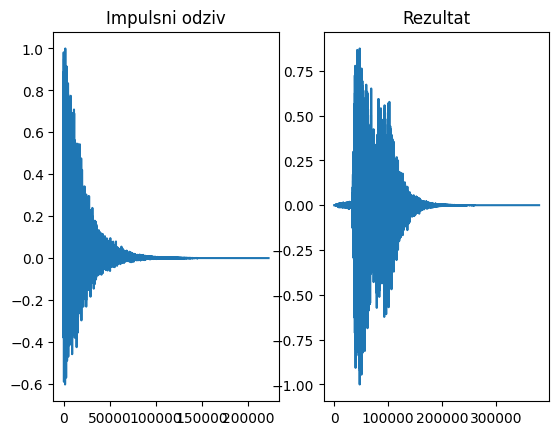

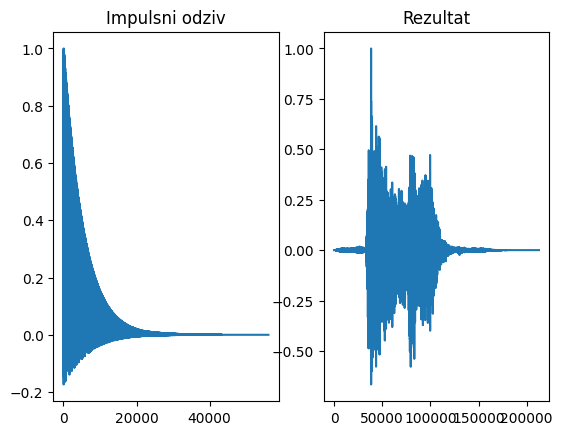

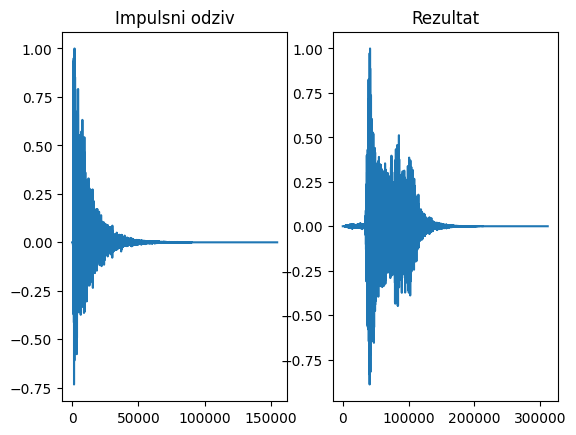

In [55]:
soundfile_path = '../Signali final.wav'
conv_paths = [
    'CastleThunder.wav',
    'OutdoorStadium.wav',
    'PlateLarge.wav',
    'PrimeShort.wav',
    'RoomLarge.wav'
]


fs, arr = wavfile.read(soundfile_path)
#print(fs, arr.shape)
plt.plot(np.arange(0,arr.shape[0]), arr)
plt.title('Prvobitni signal')
plt.show()

for i, filename in enumerate(conv_paths):
    fs_conv, arr_conv = wavfile.read('../Impulsni odzivi/'+filename)
    arr_conv = arr_conv / np.abs(arr_conv).max()
    fig, ax = plt.subplots(1,2)
    ax[0].plot(np.arange(0,arr_conv.shape[0]), arr_conv)
    ax[0].set_title('Impulsni odziv')
    print(np.median(arr_conv) )
    print(np.mean(arr_conv) )
    #print(fs_conv, arr_conv)
    res = np.convolve(arr, arr_conv)
    res = res / np.abs(res).max()
    res = res.astype(np.float32)
    ax[1].set_title('Rezultat')
    ax[1].plot(np.arange(0,res.shape[0]), res)
    fig.show()
    wavfile.write(rate=fs, data = res, filename='../output/signal nakon'+filename)

OutdoorStadium i RoomLarge daju efekat slušanja u stadionu i velikoj sobi.

Nakon CastleThunder se čuje nekoliko odjeka.

PlateLarge daje efekat kao da je zvuk reprodukovan pored metalne ploče.

PrimeShort pojačava zvučne suglasnike poput *z*.

### c) Konvolucija slike

Radjeno je sa matricama $ M_0, M_1, M_2, M_6$.

Rezultati konvolucija su uglavnom sadrzali vrednosti manje od 0 i vece od 255. One su matematicki ispravne, ali se vrednosti piksela moraju dovesti u opseg $[0,255]$ da bi se slika prikazala. Za ovaj postupak postoji vise metoda - kako bi se jasno videla razlika u odnosu na original, odabrao sam odsecanje (_clipping_), sto znaci da se vrednosti van granica menjaju minimumom ili maksimumom, a pikseli u granicama ostaju isti.

Svaka konvoluciona matrica (_kernel_) drugacije deluje na sliku:

* $M_0$ uopste ne menja sliku, osim eventualno njenih dimenzija.

* $M_1$ za svaki piksel uzima usrednjenu vrednost okolnih piksela. Ovaj postupak dovodi do toga da susedni pikseli imaju slicne vrednosti, pa se javlja efekat _zamucenja_.

* $M_2$ naglasava piksele koji su razliciti od susednih, pa se javlja efekat _uostravanja_.

* $M_3$ naglasava piksele koji se nalaze na dijagonalnoj ivici imedju svetlih i tamnih predela slike.

Za svaki kernel se moze uociti da je suma svih elemenata 1. To znaci da za originalnu sliku, kao i svaku izvedenu sliku, vazi da je suma svih vrednosti piksela ista (izuzevsi efekte odsecanja i piksele na granicama slike). Dakle, nijedna slika nije primetno svetlija ili tamnija od drugih.

TestSlika.png
Identical TestSlika.png
result_2d.max()=tensor(255.), result_2d.min()=tensor(5.3333)

Blurred TestSlika.png
result_2d.max()=tensor(246.), result_2d.min()=tensor(29.2593)

Sharpened TestSlika.png
result_2d.max()=tensor(678.3333), result_2d.min()=tensor(-229.)

DiagonalEdges TestSlika.png
result_2d.max()=tensor(820.), result_2d.min()=tensor(-645.3333)

mnist_2.png
Identical mnist_2.png
result_2d.max()=tensor(255.), result_2d.min()=tensor(0.)

Blurred mnist_2.png
result_2d.max()=tensor(252.6667), result_2d.min()=tensor(0.)

Sharpened mnist_2.png
result_2d.max()=tensor(810.), result_2d.min()=tensor(-593.)

DiagonalEdges mnist_2.png
result_2d.max()=tensor(1113.), result_2d.min()=tensor(-860.)



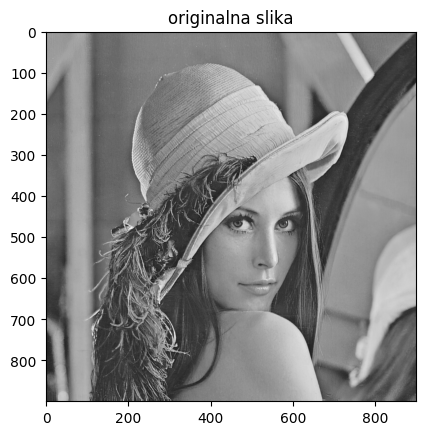

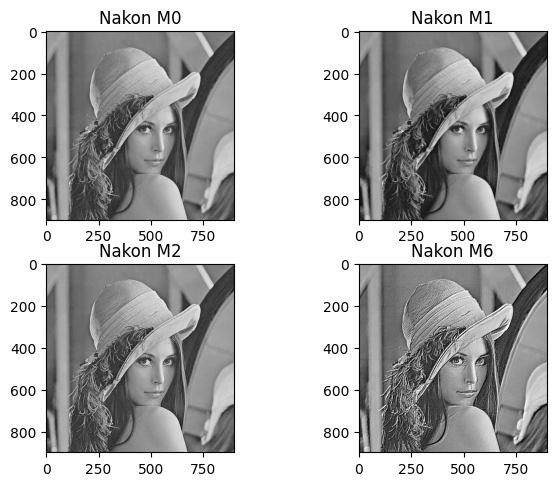

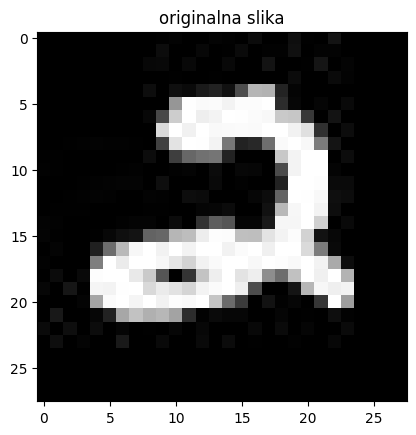

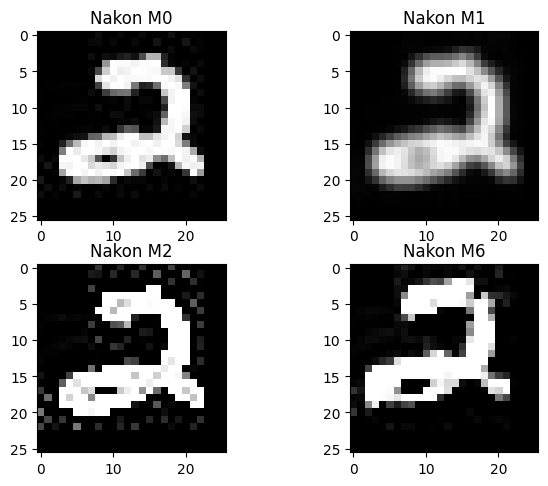

In [50]:
M0 = torch.zeros((3,3))
M0[1,1] = 1
M1 = torch.full((3,3),1/9)
M2 = torch.tensor([[0,-1,0],[-1,5,-1],[0,-1,0]])
M6 = torch.arange(3) + torch.arange(3).unsqueeze(1).expand((3,3)) - 2
M6[1,1] = 1

toPIL = ToPILImage(mode = 'L') #transformacija tenzora

def convolve(img, kernel, filename):
    batched_img = img.reshape((1,1,*img.shape))
    batched_kernel = kernel.float().reshape((1,1,3,3))
    result_4d = F.conv2d(batched_img, batched_kernel)
    result_3d = result_4d[0]
    result_2d = result_3d[0]
    print(filename)
    print(f'{result_2d.max()=}, {result_2d.min()=}')
    print()
    pil_friendly_result = result_3d.clip(0,255).byte()#.expand((3,*result_2d.shape))
    
    pil_image = toPIL(pil_friendly_result)
    # mkdir('../output')
    pil_image.save('../output/' + filename)

    return pil_friendly_result[0] #pogodno za plt.imshow


def process_image(img_path: str):
    img = read_image(img_path).float().mean(dim=0)
    fig, ax = plt.subplots(1,1)
    ax.imshow(img.numpy(), cmap='gray')
    ax.set_title('originalna slika')

    raw_name = img_path.split('/')[-1]
    name = raw_name.split('.')[0] + '.png'

    print(name)

    cropped_img = convolve(img, M0, 'Identical ' + name)
    blurred_img = convolve(img, M1, 'Blurred ' + name)
    sharpened_img = convolve(img, M2, 'Sharpened ' + name)
    diagonal_edges_img = convolve(img, M6, 'DiagonalEdges ' + name)

    fig, ax = plt.subplots(2,2)
    fig.tight_layout()

    ax[0][0].imshow(cropped_img, cmap = 'gray')
    ax[0][0].set_title('Nakon M0')

    ax[0][1].imshow(blurred_img, cmap = 'gray')
    ax[0][1].set_title('Nakon M1')

    ax[1][0].imshow(sharpened_img, cmap = 'gray')
    ax[1][0].set_title('Nakon M2')

    ax[1][1].imshow(diagonal_edges_img, cmap = 'gray')
    ax[1][1].set_title('Nakon M6')

process_image('../TestSlika.png')
process_image('../mnist_2.jpg')

## 3. Furijeovi redovi

Izvođenje:

![s](../viber_image_2024-12-08_18-56-36-632.jpg)
![s](../viber_image_2024-12-08_18-56-36-690.jpg)

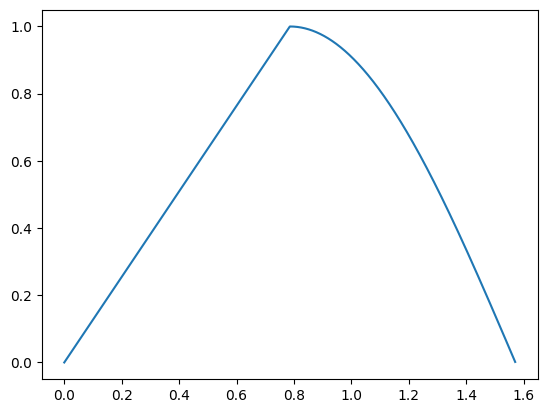

In [23]:
N_periods = 1
t = np.arange(0,N_periods*np.pi/2,1/1000)
ceo_deo = np.floor(t*2/(np.pi))
razl_deo = 2*(t*2/(np.pi) - ceo_deo)

dscr = np.sin(4*t)

a = (dscr>=0) * (razl_deo) + (dscr<0) * np.abs(np.sin(2*t))

plt.plot(t, a)
plt.show()

(1571,)
(1571,)


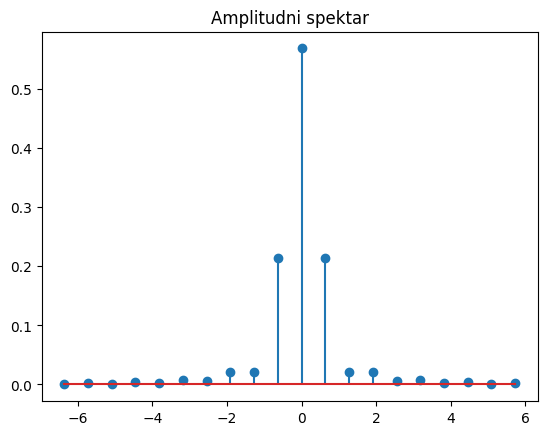

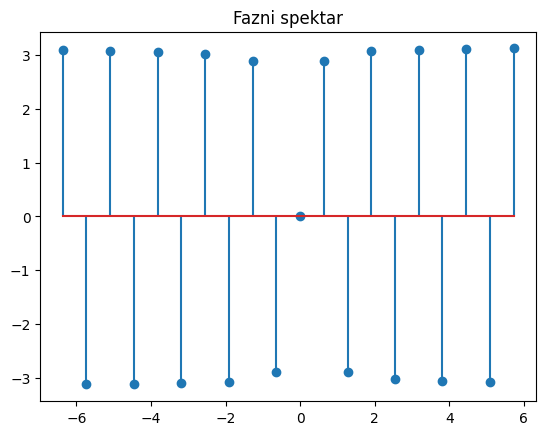

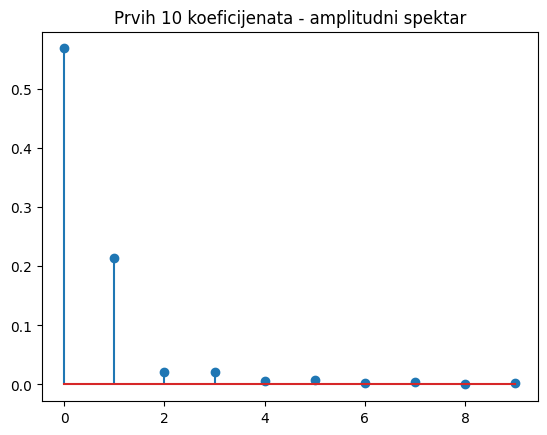

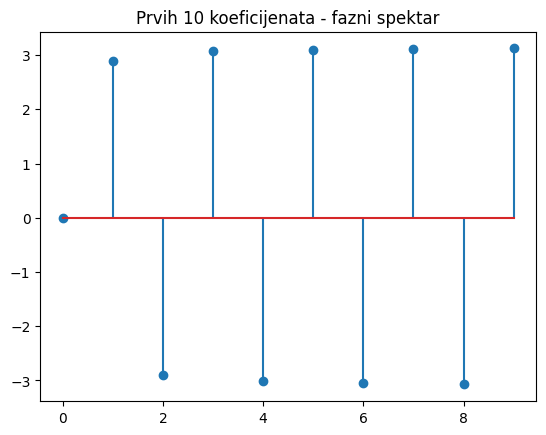

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   11,
         13, 1558, 1560, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569,
       1570]),)


/usr/local/python/3.12.1/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python/3.12.1/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


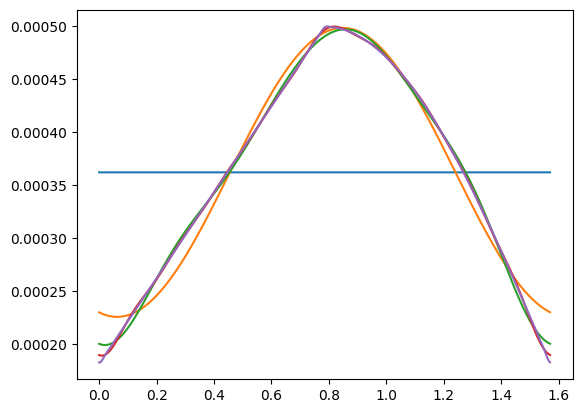

In [25]:
N = a.shape[0]

ft = np.fft.fft(a) / N
sampling_rate = 1/1000
mid = N//2
# print(mid)
freqs = np.fft.fftfreq(N, sampling_rate)
# freqs = np.fft.fftfreq(20)
print(ft.shape)
print(freqs.shape)
winlength = 500
better_freqs = np.concat([freqs[:10*N_periods], freqs[-10*N_periods:]])
better_ft = np.concat([ft[:10*N_periods], ft[-10*N_periods:]])
plt.stem(better_freqs, np.abs(better_ft))
plt.title('Amplitudni spektar')
# print(f'{better_ft=}')
plt.show()
plt.stem(better_freqs, np.angle(better_ft))
plt.title('Fazni spektar')
# print(f'{better_ft=}')
plt.show()
# plt.plot(freqs[mid-winlength:mid+winlength], ft[mid-winlength:mid+winlength])
plt.stem(np.abs(ft[:10]))
plt.title('Prvih 10 koeficijenata - amplitudni spektar')
plt.show()

plt.stem(np.angle(ft[:10]))
plt.title('Prvih 10 koeficijenata - fazni spektar')
plt.show()
# plt.plot(t, freqs)
# plt.show()

coefs = np.where(np.abs(ft)>0.001)
print(coefs)

def create_approx(k):
    mod_ft = np.zeros_like(ft, dtype = complex)
    mod_ft[:k] = ft[:k]
    res = np.fft.ifft(mod_ft)
    # plt.plot(t, res, label=str(k))
    plt.plot(t, res)# label=str(k))
    # plt.show()

create_approx(1)
create_approx(2)
create_approx(5)
create_approx(10)
create_approx(50)
# plt.legend('1','2','5','10','50')
plt.show()

# plt.plot(freqs)
# plt.show()

Nema Gibbsovog efekta, jer je funkcija neprekidna.